In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# Figures inline in notebook
%matplotlib inline

# Set display options
np.set_printoptions(suppress=True)
DISPLAY_MAX_ROWS = 20  # Number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)


In [2]:
import pandas as pd

# Read the CSV file from the provided URL
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

# Rename columns to be similar to R naming convention
data.columns = ["V" + str(i) for i in range(1, len(data.columns) + 1)]

# Convert V1 column to string type
data['V1'] = data['V1'].astype(str)

# Independent variables data
X = data.loc[:, "V2":]

# Dependent variable data
y = data['V1']

# Display the DataFrame
data


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Plotting Multivariate Data

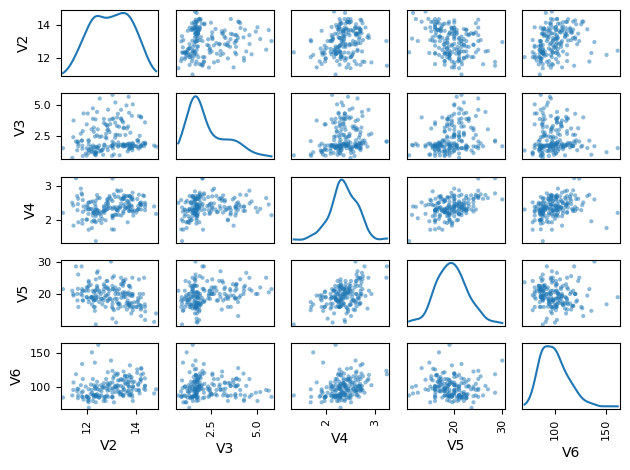

In [4]:
# Matrix Scatterplot
pd.plotting.scatter_matrix(X.loc[:, "V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()


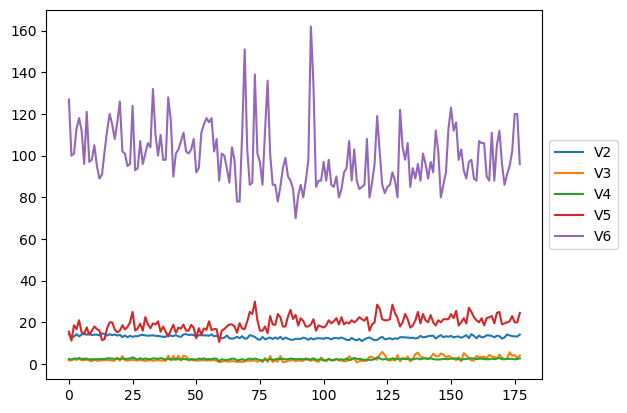

In [5]:
# Profile Plot
ax = X[["V2","V3","V4","V5","V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [6]:
# Calculating Summary Statistics for Multivariate Data


In [7]:

# Calculate means and standard deviations for all variables
means = X.apply(np.mean)
stds = X.apply(np.std)

print("Means:")
print(means)
print("\nStandard deviations:")
print(stds)

Means:
V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

Standard deviations:
V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64


In [8]:
# Means and Variances Per Group

In [23]:
# Function to print means and standard deviations by group
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std,axis=0))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

# Print means and standard deviations by group
printMeanAndSdByGroup(X, y)

## Means:


V1
1    98.081473
2    51.077883
3    60.259487
dtype: float64


## Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
V1,
1,59
2,71
3,48


p-value:	 0.21008198597074346
cor:		 0.09439694091041399


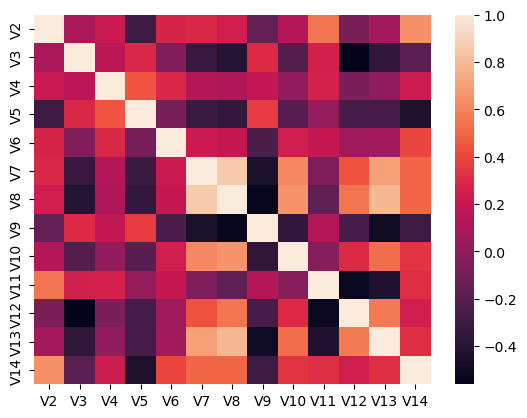

In [11]:
# Calculate the correlation coefficient for a pair of variables
corr = stats.pearsonr(X['V2'], X['V3'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

# Calculate the correlation matrix
corrmat = X.corr()

# Plot correlation matrix as a heatmap
sns.heatmap(corrmat, vmax=1., square=False)
plt.show()

In [12]:

# Function to print most highly correlated pairs of variables
def mosthighlycorrelated(mydataframe, numtoreport):
    cormatrix = mydataframe.corr().abs()
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

# Print the most highly correlated pairs of variables
print(mosthighlycorrelated(X, 10))


  FirstVariable SecondVariable  Correlation
0            V7             V8     0.864564
1            V8            V13     0.787194
2            V7            V13     0.699949
3            V8            V10     0.652692
4            V2            V14     0.643720
5            V7            V10     0.612413
6           V12            V13     0.565468
7            V3            V12     0.561296
8            V2            V11     0.546364
9            V8            V12     0.543479


In [13]:
# Principal Component Analysis (PCA)


In [17]:
# Standardize the variables
standardisedX = scale(X)
# Perform PCA
pca = PCA().fit(standardisedX)
# Function to print PCA summary
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary
# Print PCA summary
summary = pca_summary(pca, standardisedX)
print(summary.sdev)

# Decide How Many Principal Components to Retain

# Check variance of each principal component
print(summary.sdev**2)


Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.169297,0.361988,0.361988
PC2,1.580182,0.192075,0.554063
PC3,1.202527,0.111236,0.665300
PC4,0.958631,0.070690,0.735990
PC5,0.923704,0.065633,0.801623
PC6,0.801035,0.049358,0.850981
PC7,0.742313,0.042387,0.893368
PC8,0.590337,0.026807,0.920175
PC9,0.537476,0.022222,0.942397


      Standard deviation
PC1             2.169297
PC2             1.580182
PC3             1.202527
PC4             0.958631
PC5             0.923704
PC6             0.801035
PC7             0.742313
PC8             0.590337
PC9             0.537476
PC10            0.500902
PC11            0.475172
PC12            0.410817
PC13            0.321524
      Standard deviation
PC1             4.705850
PC2             2.496974
PC3             1.446072
PC4             0.918974
PC5             0.853228
PC6             0.641657
PC7             0.551028
PC8             0.348497
PC9             0.288880
PC10            0.250902
PC11            0.225789
PC12            0.168770
PC13            0.103378


In [19]:
# Linear Discriminant Analysis (LDA)



Coefficients of linear discriminants:


,LD1,LD2
V2,-0.403400,0.871793
V3,0.165255,0.305380
V4,-0.369075,2.345850
V5,0.154798,-0.146381
V6,-0.002163,-0.000463
V7,0.618052,-0.032213
V8,-1.661191,-0.491998
V9,-1.495818,-1.630954
V10,0.134093,-0.307088
V11,0.355056,0.253231


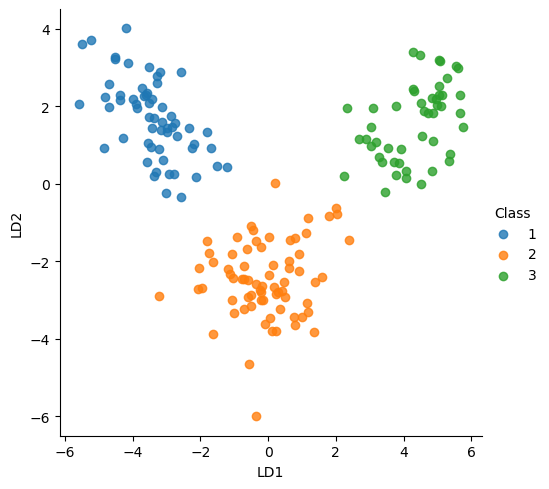

In [22]:
# Linear Discriminant Analysis (LDA)

# Perform LDA
lda = LinearDiscriminantAnalysis().fit(X, y)

# Loadings for the Discriminant Functions
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

# Scatterplots of the Discriminant Functions
lda_values = pd.DataFrame(lda.transform(X), columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
y_renamed = y.rename("Class")  # Rename 'V1' column to avoid overlap
lda_values_with_class = lda_values.join(y_renamed)

sns.lmplot(x="LD1", y="LD2", data=lda_values_with_class, hue="Class", fit_reg=False)
plt.show()
